In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

### Hello Clustering (T1-T3)

In [2]:
x = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7])
y = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
points = np.array([np.array( [i[0], i[1]] ) for i in zip(x, y)])
print(points)


[[ 1  2]
 [ 3  3]
 [ 2  2]
 [ 8  8]
 [ 6  6]
 [ 7  7]
 [-3 -3]
 [-2 -4]
 [-7 -7]]


[[ 3  3]
 [ 2  2]
 [-3 -3]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]


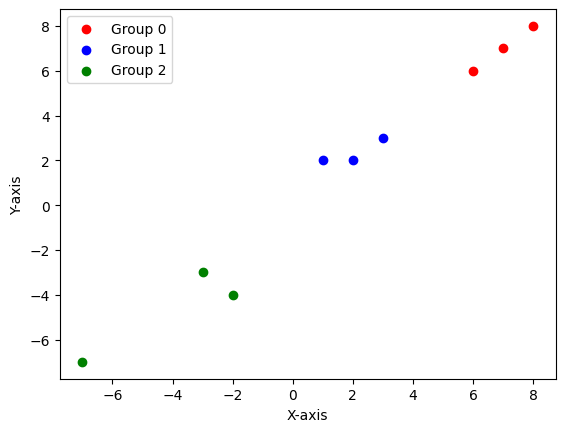

In [3]:
def kmeans(n_clusters=3, max_iter=30):
    m = len(points)

    def _euclidean_distance(p1, p2):
        return np.sqrt(np.sum((p1 - p2) ** 2))

    # initialize centroids
    # Random
    # centroids = np.array(
    #     [points[i] for i in np.random.choice(len(points), n_clusters, replace=False)]
    # )

    # Force
    centroids = np.array([points[1], points[2], points[6]])
    # centroids = np.array([points[6], points[2], points[8]])

    old_centroids = np.zeros(centroids.shape)
    print(centroids)
    print(old_centroids)

    n = 0
    while not np.equal(old_centroids, centroids).all() and n < max_iter:
        # assign points to clusters
        old_centroids = centroids.copy()
        centroids = [[] for i in range(n_clusters)]
        for i in range(0, m):
            distances = [
                _euclidean_distance(points[i], centroid) for centroid in old_centroids
            ]
            min_dis_centroid = np.argmin(distances)
            centroids[min_dis_centroid].append(points[i])

        cluster = centroids.copy()

        # update centroids
        for j in range(n_clusters):
            centroids[j] = np.mean(centroids[j], axis=0)

        n += 1

    return cluster

# Colors for each group
colors = ['red', 'blue', 'green']

# Create a scatter plot for each group
for i, group in enumerate(kmeans()):
    group = np.array(group)
    plt.scatter(group[:, 0], group[:, 1], label=f'Group {i}', color=colors[i])

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

### My Heart Will Go On

In [3]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

train.head()
# train.tail()
# train.shape
# train.info()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train["Age"] = train["Age"].fillna(train["Age"].median())

train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

test["Age"] = test["Age"].fillna(test["Age"].median())

test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2

test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


### Logistic Regression

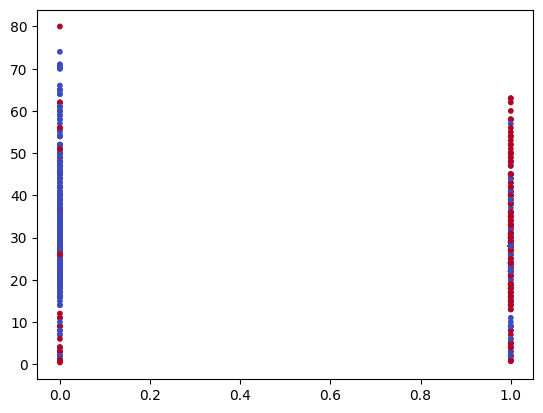

In [7]:
# X_train = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
X_train = np.array(train[["Sex","Age"]].values, dtype = float)
y_train = np.array(train["Survived"].values, dtype = float).reshape(-1,1)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train[:,0], cmap=plt.cm.coolwarm, s=10)

X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)

# normalize X_train for each column
for i in range(X_train.shape[1]):
    X_train[:,i] = (X_train[:,i] - X_train_mean[i]) / X_train_std[i]

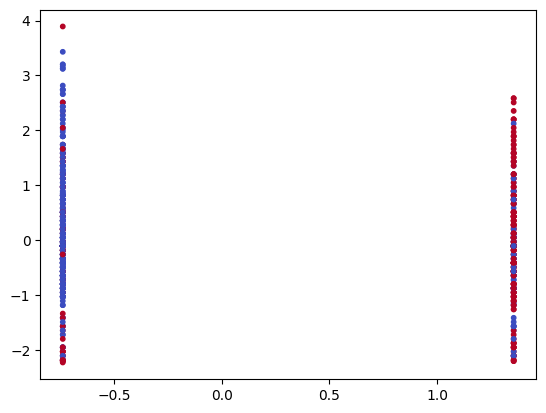

In [8]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train[:,0], cmap=plt.cm.coolwarm, s=10)

In [79]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

def model(X, y, lr, max_iter=250) -> (np.ndarray, list):
    cost_list = []
    
    X = X.T # 2 x 891
    y = y.T # 1 x 891
    
    weights = np.zeros((X.shape[0], 1)) # 2 x 1
    b = 0
    
    for i in range(max_iter):
        h = sigmoid(np.dot(weights.T, X) + b) # 1 x 891
        error = h - y # 1 x 891
        grad = np.dot(X, error.T)
        
        weights = weights - lr * grad # 2 x 1
        b = b - lr * np.sum(error)
        
        cost_list.append(np.sum(np.power(error, 2)))
    
    return weights, b, cost_list


best_weights, b, cost_list = model(X_train, y_train, 0.000001)
print(best_weights, b, cost_list)

[[ 0.05926127]
 [-0.01082082]] 0.004427119864475711 [222.75, 206.94329959535622, 194.69453649765168, 185.23363416903763, 177.91992963866997, 172.24624212072322, 167.82213401434214, 164.3514548249001, 161.61103474671583, 159.43291420012753, 157.6904236804664, 156.28763498419605, 155.1515051628009, 154.22607383783964, 153.46818838595945, 152.84435178067505, 152.32839084259203, 151.8997233885453, 151.54206334749497, 151.24244730307677, 150.99049805435692, 150.7778639113274, 150.5977890588457, 150.44478227710135, 150.31435993169805, 150.20284539473082, 150.10721160670323, 150.02495681789287, 149.9540059976421, 149.8926322135367, 149.83939363271017, 149.7930828087796, 149.75268567967498, 149.71734827870822, 149.68634960084307, 149.65907940285263, 149.6350199753262, 149.61373112516154, 149.5948377632657, 149.57801961418656, 149.56300266019204, 149.5495520078777, 149.5374659252462, 149.52657084482485, 149.51671716642815, 149.50777572367872, 149.49963480295077, 149.4921976232385, 149.485380201

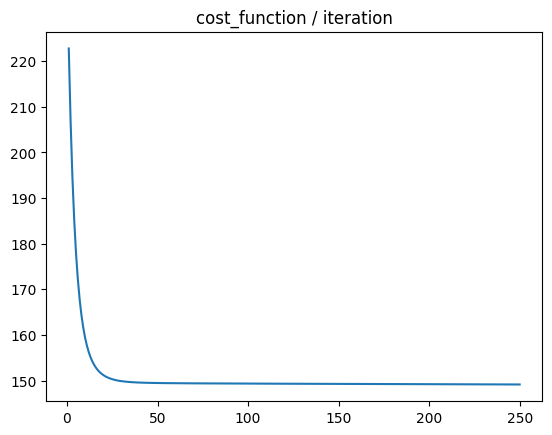

In [80]:
iteration = np.linspace(1, len(cost_list), len(cost_list))

plt.subplot(1,1,1)
plt.plot(iteration, cost_list)
plt.title("cost_function / iteration")
plt.show()

In [81]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [82]:
# X_test = np.array(test[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
X_test = np.array(test[["Sex","Age"]].values, dtype = float)

# normalize X_train for each column WARNING: use X_train_mean and X_train_std
for i in range(X_train.shape[1]):
    X_train[:,i] = (X_train[:,i] - X_train_mean[i]) / X_train_std[i]

# print(X_test)
X_test.shape


(418, 2)

In [107]:
y_pred = sigmoid(np.dot(best_weights.T, X_test.T) + b)  # 1 x m
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred
# y_pred.shape

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [84]:
sum(sum(y_pred))

8

In [108]:
# create dataframe with X_test["PassengerId"] and y_pred
df = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": y_pred[0]
})
df.to_csv("submission.csv", index=False)